In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('boston.xlsx')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [3]:
#Exploratory Analysis
print (data.shape)
print (data.dtypes)

(506, 14)
CRIM     float64
ZN       float64
INDUS    float64
CHAS       int64
NOX      float64
RM       float64
AGE      float64
DIS      float64
RAD        int64
TAX        int64
PT       float64
B        float64
LSTAT    float64
MV       float64
dtype: object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f07af043748>,
      dtype=object)

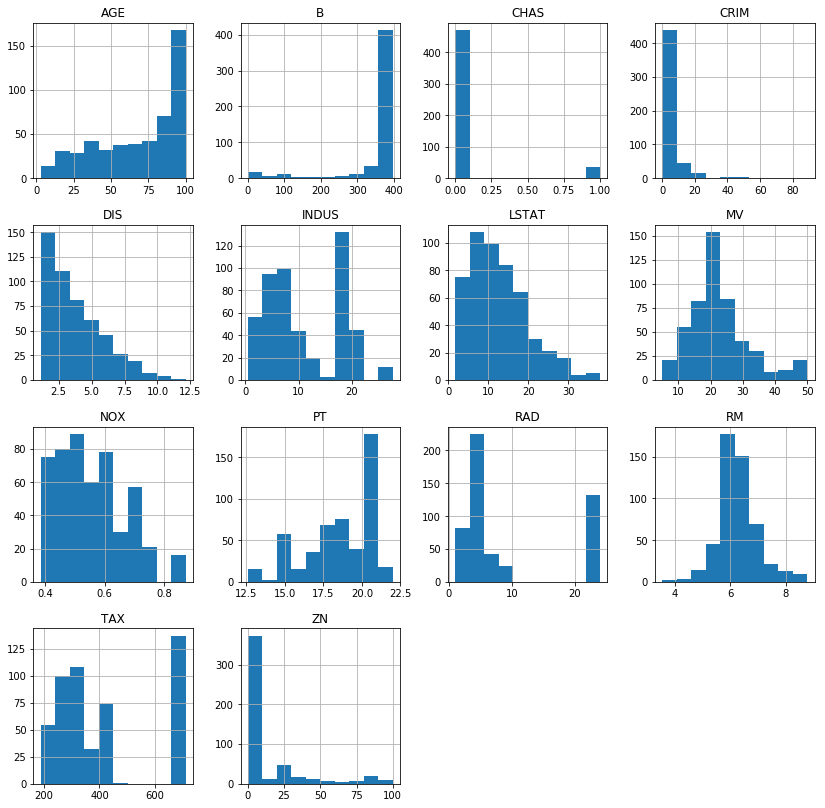

In [4]:
data.hist(figsize=(14,14))

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [6]:
#Segmentation
data.groupby('CHAS').mean()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CHAS,,,,,,,,,,,,,
0,3.744447,11.634820,11.019193,0.551817,6.267174,67.911677,3.851915,9.566879,409.870488,18.527176,355.461038,12.757941,22.093843
1,1.851670,7.714286,12.719143,0.593426,6.519600,77.500000,3.029709,9.314286,386.257143,17.491429,372.997428,11.241714,28.440000


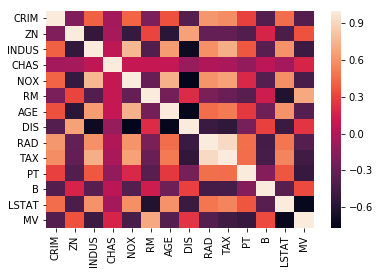

In [7]:
sns.heatmap(data.corr())#As you can see No.of Rooms is highly correaleated to the MV and ZN ,B have the positive corr.

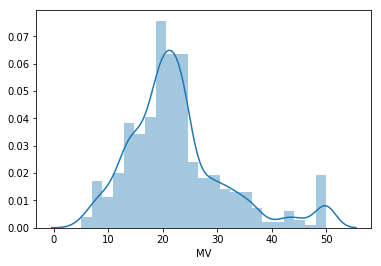

In [8]:
sns.distplot(data['MV'])#actually the plot shows the right skewness . i.e it has an outliers towards the right so 
#It is useful plot to transform the MV into log for better hypothesis during Regresssion.

In [9]:
#Step 3- Data Cleaning 
data.drop
data.shape
#No dulipicate values , So no need to remove any data.
#Fix Structures like typos , mislabled generally cleanning the structure of the Data-NO NEED data is perfect.

(506, 14)

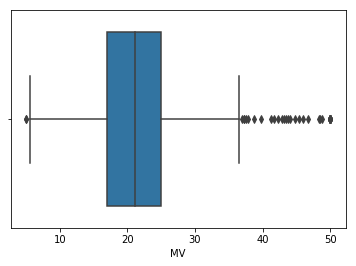

In [11]:
#Filter the Outliers
sns.boxplot(data.MV)

-0.33032130315877517

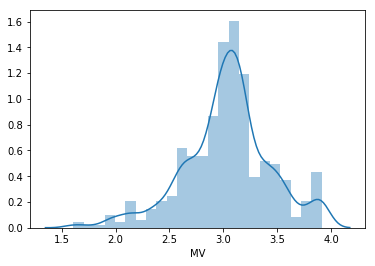

In [12]:
sns.distplot(np.log(data.MV))
np.log(data.MV).skew()#Better to take log to get better accurarcy 

In [13]:
#Missing Values 
for columns in data.columns:
    print(data[columns].isnull().value_counts())#It doesnt contains any Missing Values.So , we can move to the next Step

False    506
Name: CRIM, dtype: int64
False    506
Name: ZN, dtype: int64
False    506
Name: INDUS, dtype: int64
False    506
Name: CHAS, dtype: int64
False    506
Name: NOX, dtype: int64
False    506
Name: RM, dtype: int64
False    506
Name: AGE, dtype: int64
False    506
Name: DIS, dtype: int64
False    506
Name: RAD, dtype: int64
False    506
Name: TAX, dtype: int64
False    506
Name: PT, dtype: int64
False    506
Name: B, dtype: int64
False    506
Name: LSTAT, dtype: int64
False    506
Name: MV, dtype: int64


In [14]:
#Step 4 - Feature Engneering 
#Combination of Sparse Classes can't be done as there is only 2 class for CHAS and it is also  converted into the
#dummy variable and hence no need to convert.
#Removing the unused Features : As per my knowledge there are no  unused Features.

In [15]:
#Step 5 - Model Trainning 
#Split and Train 
X=data.drop('MV',axis =1)
y=data['MV']
y.head()

0    24.000000
1    21.600000
2    34.700001
3    33.400002
4    36.200001
Name: MV, dtype: float64

In [16]:
from sklearn.cross_validation import train_test_split
X_train , X_test,y_train , y_test =train_test_split(X,y,test_size =0.2)

/media/akki/0C77C1DB5023617A/Downloads/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
#Data Preprocessing 
from sklearn.preprocessing import StandardScaler
#making a pipeline 
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression , ElasticNet, Ridge, Lasso
pipe={
    'Enet':make_pipeline(StandardScaler(),ElasticNet()),
       'ridge':make_pipeline(StandardScaler(),Ridge()),
       'lasso':make_pipeline(StandardScaler(),Lasso())}
pipe1={'Linear':make_pipeline(StandardScaler(),LinearRegression),}

In [18]:
#Checking the pipe 
for key , values in pipe.items():
    print(key , type(values))

Enet <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
lasso <class 'sklearn.pipeline.Pipeline'>


In [25]:
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X)
X_scaled=standard_scaler.transform(X)
model1=LinearRegression()
score=cross_val_score(model1 , X_scaled, np.log(y) , cv=10 ,scoring='r2')#As we have seen MV has right skewness so,thats why we have taken for better accuracy 
score.max()


0.7783331331825858

In [21]:
#Decalring the hyperparameters 
lasso_hyperparameters = { 'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] }
ridge_hyperparameters = { 'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] }
enet_hyperparameters = { 'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 
                       'elasticnet__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

In [22]:
#Creating hyperparameters Dictionary 
hyperparameters={
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'Enet' : enet_hyperparameters}

In [23]:
#Fit and Tune using cross-validation 
fitted_models = {}
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV
for name , pipeline in pipe.items():
    model = GridSearchCV(pipeline , hyperparameters[name] ,cv =10 ,n_jobs=-1)
    model.fit(X_train,np.log(y_train))
    fitted_models[name]=model
    print(name, 'has been fitted.')

Enet has been fitted.
ridge has been fitted.
lasso has been fitted.


In [24]:
#Evalute the model 
for name, model in fitted_models.items():
    print(name, model.best_score_)#r2-values

Enet 0.7631593093167541
ridge 0.7624576581902903
lasso 0.7630397598054053


Enet
-------
R^2:  0.780015053015159
MAE:  0.14355126868408064


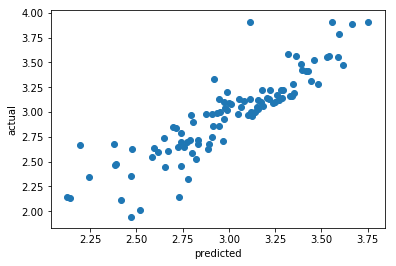

ridge
-------
R^2:  0.7812817150573319
MAE:  0.14325585457553572


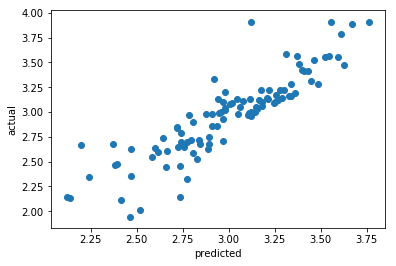

lasso
-------
R^2:  0.7796093455853336
MAE:  0.1443828180140164


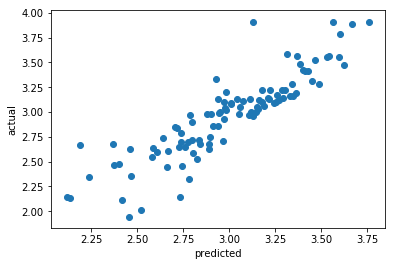

Linear
-------
R^2:  0.7796093455853336
MAE:  0.1443828180140164


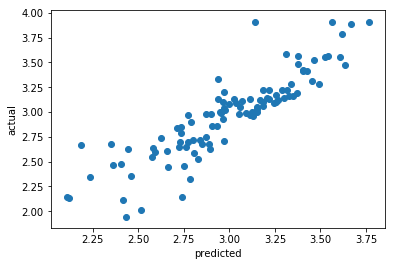

In [73]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
for name, model in fitted_models.items(): 
    pred_var = model.predict(X_test)
    print(name)
    print('-------')
    print('R^2: ', r2_score(np.log(y_test), pred_var))
    print('MAE: ', mean_absolute_error(np.log(y_test), pred_var))
    plt.scatter(pred_var, np.log(y_test))
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()
print("Linear")
print('-------')
model1.fit(X_train,np.log(y_train))
pp=model1.predict(X_test)
print('R^2: ', r2_score(np.log(y_test), pred_var))
print('MAE: ', mean_absolute_error(np.log(y_test), pred_var))
plt.scatter(pp, np.log(y_test))
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()